In [1]:
# import libraries
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
import pydotplus
from IPython.display import Image

In [2]:
#import the data and display
#data=pd.read_csv('loan.csv', header='infer')
data=pd.read_csv('loanencoded.csv', header='infer')
data

,HomeOwner,MaritalStatus,AnnualIncome,DefaultedBorrower
0,1,1,125,no
1,0,2,100,no
2,0,1,70,no
3,1,2,120,no
4,0,0,95,yes
5,0,2,60,no
6,1,0,220,no
7,0,1,85,yes
8,0,2,75,no
9,0,1,90,yes


In [3]:
data.columns

Index(['HomeOwner', 'MaritalStatus', 'AnnualIncome', 'DefaultedBorrower'], dtype='object')

In [4]:
## drop non-feature columns

x=data.drop(['DefaultedBorrower'], axis=1)
x

,HomeOwner,MaritalStatus,AnnualIncome
0,1,1,125
1,0,2,100
2,0,1,70
3,1,2,120
4,0,0,95
5,0,2,60
6,1,0,220
7,0,1,85
8,0,2,75
9,0,1,90


In [5]:
y=data['DefaultedBorrower']
y

0     no
1     no
2     no
3     no
4    yes
5     no
6     no
7    yes
8     no
9    yes
Name: DefaultedBorrower, dtype: object

In [6]:
# Encode the categorical features as integers
#enc=preprocessing.OneHotEncoder()
#enc.fit(x)
#x_enc=enc.transform(x).toarray()
#x_enc

In [7]:
#enc.categories_

In [8]:
#x=pd.get_dummies(x)
#x

In [9]:
# create a decision tree using entropy based on IG
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf=clf.fit(x,y)

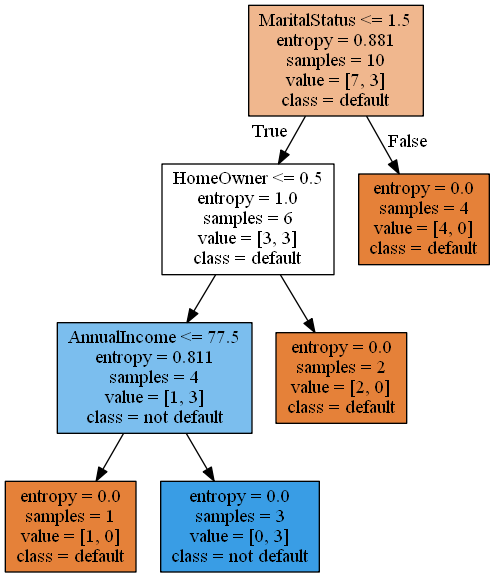

In [10]:
dot_data=tree.export_graphviz(clf,feature_names=x.columns,class_names=['default','not default'],filled=True,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
data.columns

Index(['HomeOwner', 'MaritalStatus', 'AnnualIncome', 'DefaultedBorrower'], dtype='object')

In [12]:
#test the tree
testData=[[1,0,200,'yes'],[0,0,120,'no'],[1,2,250,'yes'],[1,1,500,'yes']]
testData=pd.DataFrame(testData,columns=data.columns)

In [13]:
testY=testData['DefaultedBorrower']
testY

0    yes
1     no
2    yes
3    yes
Name: DefaultedBorrower, dtype: object

In [14]:
testX=testData.drop(['DefaultedBorrower'],axis=1)
testX

,HomeOwner,MaritalStatus,AnnualIncome
0,1,0,200
1,0,0,120
2,1,2,250
3,1,1,500


In [15]:
predY=clf.predict(testX)
predY

array(['no', 'yes', 'no', 'no'], dtype=object)

In [16]:
#display predictions in table
predicitons=pd.concat([testData,pd.Series(predY,name='Predicted')],axis=1)
predicitons

,HomeOwner,MaritalStatus,AnnualIncome,DefaultedBorrower,Predicted
0,1,0,200,yes,no
1,0,0,120,no,yes
2,1,2,250,yes,no
3,1,1,500,yes,no


In [17]:
#calculate accuracy
from sklearn.metrics import accuracy_score
print ('accuracy on test data is %.2f'% accuracy_score(testY,predY))

accuracy on test data is 0.00
